<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-Infos" data-toc-modified-id="Basic-Infos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic Infos</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualizations</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/breno/.virtualenvs/dtsci/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/breno/.virtualenvs/dtsci/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Reading data
df = pd.read_csv('serie_precos_completa.csv', sep=';', header=0,
                encoding='ISO-8859-1')

## Basic Infos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 10 columns):
valor_compra            751845 non-null float64
valor_venda             1500000 non-null float64
unidade                 1500000 non-null object
municipio               1500000 non-null object
regiao                  1500000 non-null object
estado                  1500000 non-null object
bandeira                1500000 non-null object
produto                 1500000 non-null object
razao_social_revenda    1500000 non-null object
data_coleta             1500000 non-null object
dtypes: float64(2), object(8)
memory usage: 114.4+ MB


In [4]:
df.columns

Index(['valor_compra', 'valor_venda', 'unidade', 'municipio', 'regiao',
       'estado', 'bandeira', 'produto', 'razao_social_revenda', 'data_coleta'],
      dtype='object')

In [5]:
df.head()

,valor_compra,valor_venda,unidade,municipio,regiao,estado,bandeira,produto,razao_social_revenda,data_coleta
0,NaN,1.46,R$ / litro,BRASILIA,CO,DF,ALESAT,DIESEL,MINA COMBUSTÍVEIS LTDA,10/05/2004
1,1.2490,1.46,R$ / litro,BRASILIA,CO,DF,BRANCA,DIESEL,AMORIM COMERCIO DE DERIVADOS DE PETROLEO LTDA,10/05/2004
2,1.2400,1.46,R$ / litro,BRASILIA,CO,DF,BRANCA,DIESEL,AMORIM E AMORIM EMPREENDIMENTOS COMERCIAIS,10/05/2004
3,1.2526,1.46,R$ / litro,BRASILIA,CO,DF,BRANCA,DIESEL,AUTO POSTO CEILANDIA NORTE LTDA,10/05/2004
4,1.2526,1.46,R$ / litro,BRASILIA,CO,DF,BRANCA,DIESEL,AUTO POSTO MILLENNIUM 2000 LTDA,10/05/2004


## Preprocessing

- Taking care of date

In [3]:
%%time
# This takes aprox. 3min30s

df['data_coleta'] = pd.to_datetime(df['data_coleta'])
df['ano_coleta'] = df['data_coleta'].dt.year
df['mes_coleta'] = df['data_coleta'].dt.month
df['dia_coleta'] = df['data_coleta'].dt.day

CPU times: user 3min 16s, sys: 68.4 ms, total: 3min 16s
Wall time: 3min 16s


## Visualizations

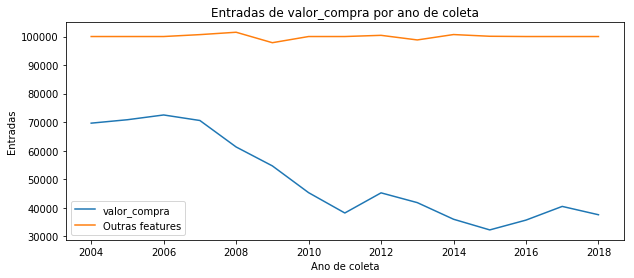

In [4]:
# Inconsistencia do valor_compra
fig, ax = plt.subplots(figsize  = (10,4))

y_val = df.groupby('ano_coleta').count()['valor_compra']
y_outros = df.groupby('ano_coleta').count()['unidade']
x = df.groupby('ano_coleta').count().index
ax.plot(x, y_val, label='valor_compra')
ax.plot(x, y_outros, label='Outras features')

ax.set_title('Entradas de valor_compra por ano de coleta')
ax.set_ylabel('Entradas')
ax.set_xlabel('Ano de coleta')

plt.legend()
plt.savefig('./graphs/valor_compra_por_ano.png', dpi=200)

plt.show()

In [23]:
# Distribuição de entradas por regiao
#y_outros = 
df.groupby('ano_coleta').count()[['unidade','valor_venda']]
#x = df.groupby('ano_coleta').count().index

,unidade,valor_venda
ano_coleta,,
2004,100000,100000
2005,100000,100000
2006,100000,100000
2007,100666,100666
2008,101500,101500
2009,97834,97834
2010,100000,100000
2011,100000,100000
2012,100418,100418


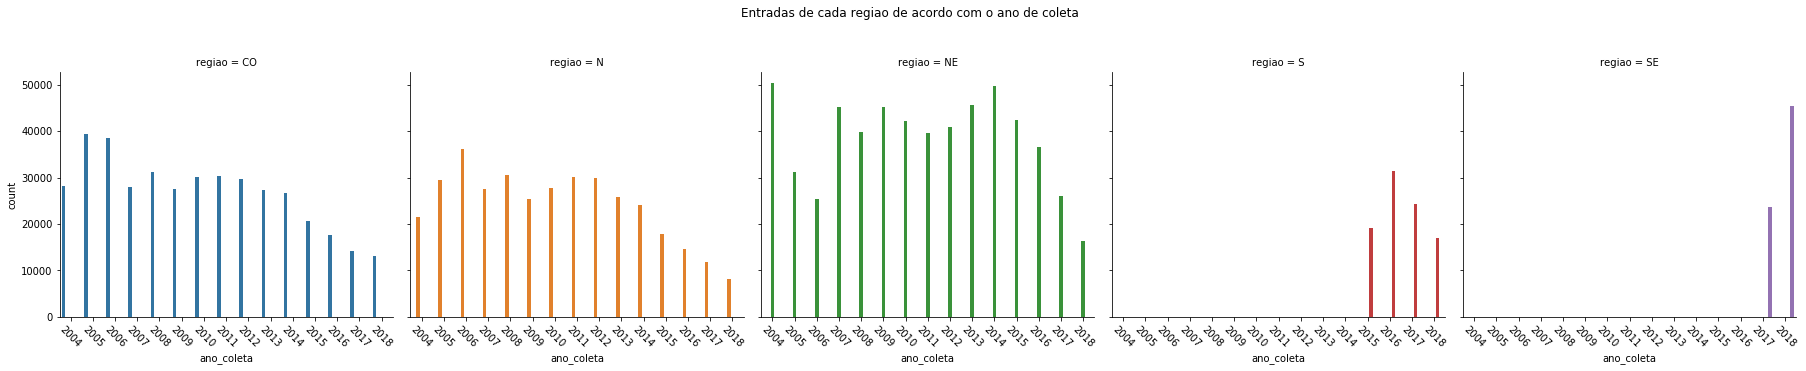

In [46]:
g = sns.catplot(x= 'ano_coleta', hue='regiao', col='regiao', data=df, kind='count')
g.set_xticklabels(rotation=-45)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Entradas de cada regiao de acordo com o ano de coleta')
plt.savefig('./graphs/regiao_por_ano_catplot.png')#, dpi=200)
plt.show()

/home/breno/.virtualenvs/dtsci/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


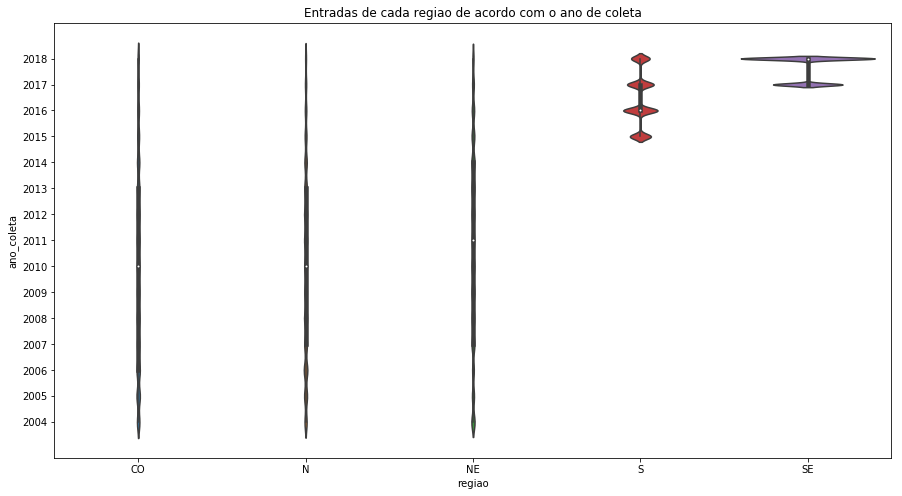

In [39]:
# Violin plot with Pokemon color palette
plt.figure(figsize=(15,8))
sns.violinplot(y='ano_coleta', x='regiao', data=df)
plt.yticks(np.arange(2004,2019,1))
plt.title('Entradas de cada regiao de acordo com o ano de coleta')
plt.savefig('./graphs/regiao_por_ano_violinplot.png')#, dpi=200)
plt.show()